Files already downloaded and verified
Files already downloaded and verified


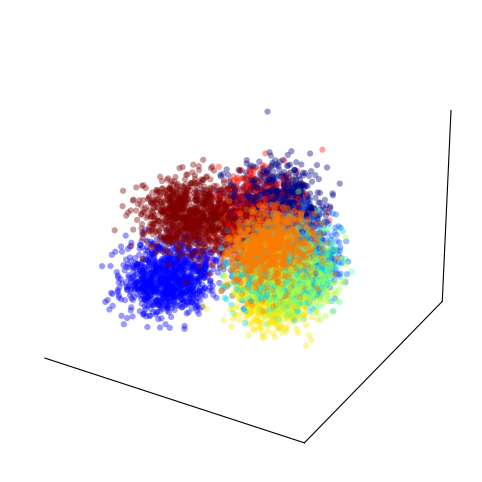

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# Set font to Arial
rcParams['font.family'] = 'Arial'
# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs

# Load the pre-trained model
n = 1
model = LeNet5Color()
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)

layers = output.keys()
model5_accuracies = dict()
layers = ['relu1']

for layer in layers:
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)

        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 3 components
        lda = LinearDiscriminantAnalysis(n_components=3)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select five classes (e.g., classes 0, 1, 2, 3, and 4)
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_lda_selected = X_lda[:]
        y_selected = y[:]

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        # Plot the decision boundary and regions in 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_lda_selected[:, 0], X_lda_selected[:, 1], X_lda_selected[:, 2], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.4)
       # legend = ax.legend(*scatter.legend_elements(), title="Classes")
       # ax.add_artist(legend)
        #ax.set_xlabel('Linear Discriminant 1')
        #ax.set_ylabel('Linear Discriminant 2')
       # ax.set_zlabel('Linear Discriminant 3')
        
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
         # Find and set axis limits
        x_limits = ax.get_xlim()
        y_limits = ax.get_ylim()
        z_limits = ax.get_zlim()
        
        ax.grid(False)
                # Remove ticks from all axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.tick_params(axis='both', which='both', length=0)

        #ax.set_title('LDA with Linear Decision Boundary (3D)')
        ax.grid(False)  # Remove the grid
        plt.show()


Files already downloaded and verified
Files already downloaded and verified


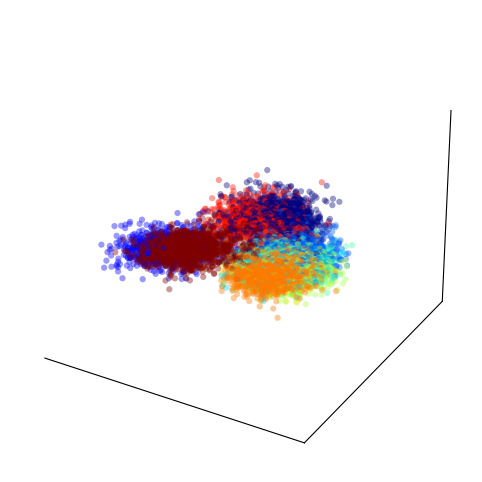

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs

# Load the pre-trained model
n = 1
model = LeNet5Color()
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)

layers = output.keys()
model5_accuracies = dict()
layers = ['relu1']

for layer in layers:
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)

        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 3 components
        lda = LinearDiscriminantAnalysis(n_components=3)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select five classes (e.g., classes 0, 1, 2, 3, and 4)
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_lda_selected = X_lda[:]
        y_selected = y[:]

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        # Plot the decision boundary and regions in 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_lda_selected[:, 0], X_lda_selected[:, 1], X_lda_selected[:, 2]/10, c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.4)
       # legend = ax.legend(*scatter.legend_elements(), title="Classes")
       # ax.add_artist(legend)
        #ax.set_xlabel('Linear Discriminant 1')
        #ax.set_ylabel('Linear Discriminant 2')
       # ax.set_zlabel('Linear Discriminant 3')
        
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
         # Find and set axis limits
        ax.set_xlim(x_limits)
        ax.set_ylim(y_limits)
        ax.set_zlim(z_limits)
        
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.tick_params(axis='both', which='both', length=0)

        ax.grid(False)
                # Remove ticks from all axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_title('LDA with Linear Decision Boundary (3D)')
        ax.grid(False)  # Remove the grid
        plt.show()


Files already downloaded and verified
Files already downloaded and verified


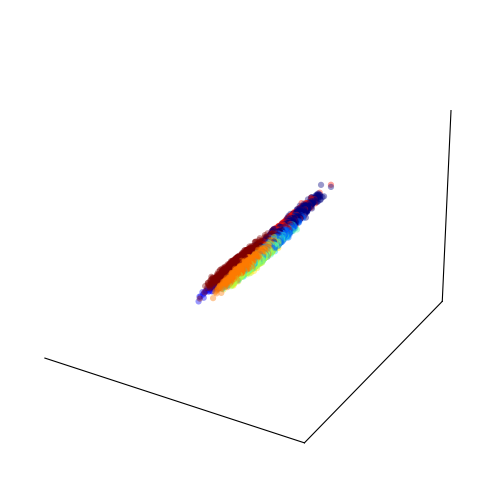

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs

# Load the pre-trained model
n = 1
model = LeNet5Color()
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)

layers = output.keys()
model5_accuracies = dict()
layers = ['relu1']

for layer in layers:
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)

        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 3 components
        lda = LinearDiscriminantAnalysis(n_components=3)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select five classes (e.g., classes 0, 1, 2, 3, and 4)
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_lda_selected = X_lda[:]
        y_selected = y[:]

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        # Plot the decision boundary and regions in 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_lda_selected[:, 0]/10, X_lda_selected[:, 1], X_lda_selected[:, 2]/10, c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.4)
       # legend = ax.legend(*scatter.legend_elements(), title="Classes")
       # ax.add_artist(legend)
        #ax.set_xlabel('Linear Discriminant 1')
        #ax.set_ylabel('Linear Discriminant 2')
       # ax.set_zlabel('Linear Discriminant 3')
        
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
         # Find and set axis limits
        ax.set_xlim(x_limits)
        ax.set_ylim(y_limits)
        ax.set_zlim(z_limits)
        
        ax.grid(False)
                # Remove ticks from all axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        # Remove tick marks and tick labels
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
        ax.tick_params(axis='both', which='both', length=0)

        #ax.set_title('LDA with Linear Decision Boundary (3D)')
        ax.grid(False)  # Remove the grid
        plt.show()
